## Libraries / pulling stock prices
## Kitaplıklar / stok fiyatları çekme

In [54]:
import yfinance as yf 
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 

In [55]:
df =yf.download("AAPL",start="2020-01-01")

[*********************100%***********************]  1 of 1 completed


In [56]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249039,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536888,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114883,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771034,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.941628,132079200
...,...,...,...,...,...,...
2023-08-09,180.869995,180.929993,177.009995,178.190002,177.949707,60378500
2023-08-10,179.479996,180.750000,177.600006,177.970001,177.729996,54686900
2023-08-11,177.320007,178.619995,176.550003,177.789993,177.789993,51988100


## Regression for the very first date
## İlk tarihe yönelik regresyon

In [57]:
window=25

In [58]:
test_df=df[:window]

In [59]:
test_df.shape

(25, 6)

In [60]:
test_df.iloc[-1].name

Timestamp('2020-02-06 00:00:00')

In [61]:
test_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249039,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536888,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114883,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771034,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.941628,132079200
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.512238,170108400
2020-01-10,77.650002,78.167503,77.062500,77.582497,75.682930,140644800
2020-01-13,77.910004,79.267502,77.787498,79.239998,77.299843,121532000
2020-01-14,79.175003,79.392502,78.042503,78.169998,76.256058,161954400


In [62]:
y_=test_df.Close

In [63]:
y_

Date
2020-01-02    75.087502
2020-01-03    74.357498
2020-01-06    74.949997
2020-01-07    74.597504
2020-01-08    75.797501
2020-01-09    77.407501
2020-01-10    77.582497
2020-01-13    79.239998
2020-01-14    78.169998
2020-01-15    77.834999
2020-01-16    78.809998
2020-01-17    79.682503
2020-01-21    79.142502
2020-01-22    79.425003
2020-01-23    79.807503
2020-01-24    79.577499
2020-01-27    77.237503
2020-01-28    79.422501
2020-01-29    81.084999
2020-01-30    80.967499
2020-01-31    77.377502
2020-02-03    77.165001
2020-02-04    79.712502
2020-02-05    80.362503
2020-02-06    81.302498
Name: Close, dtype: float64

In [64]:
X_=pd.Series(range(len(test_df.index))).values

In [65]:
model_=sm.OLS(y_,sm.add_constant(X_)).fit()

In [66]:
model_.params

const    75.714038
x1        0.210839
dtype: float64

In [67]:
75.714038+24*0.210839

80.774174

In [68]:
model_.predict()

array([75.71403799, 75.92487652, 76.13571505, 76.34655358, 76.55739211,
       76.76823064, 76.97906917, 77.1899077 , 77.40074623, 77.61158475,
       77.82242328, 78.03326181, 78.24410034, 78.45493887, 78.6657774 ,
       78.87661593, 79.08745446, 79.29829299, 79.50913152, 79.71997005,
       79.93080857, 80.1416471 , 80.35248563, 80.56332416, 80.77416269])

In [69]:
model_.predict()[-1]

80.77416269155646

In [70]:
df.shape[0]-24

887

## Running ALL regressions
## Tüm Regresyonları Çalıştırma

In [71]:
lsma_arr=[]
dates_arr=[]

for i in range(len(df)-24):
    input_reg=df[i:25+i]
    X=pd.Series(range(len(input_reg.index))).values
    y=input_reg.Close
    model=sm.OLS(y,sm.add_constant(X)).fit()
    pred=model.predict()[-1]
    lsma_arr.append(pred)
    dates_arr.append(input_reg.iloc[-1].name)

In [72]:
lsma_arr

[80.77416269155646,
 80.7875011502779,
 80.75431586632358,
 80.63974578857419,
 80.73734649658202,
 80.77663862961984,
 80.89771608792815,
 80.77316962608923,
 80.93535381610573,
 80.8714300537109,
 80.48985252967246,
 79.62184431809641,
 78.48231320894678,
 77.54256697434643,
 75.95956683819107,
 74.50308967003454,
 74.09333582951469,
 73.18368265005253,
 72.99995941162109,
 72.61359849196211,
 72.1437215717022,
 70.60539933424728,
 69.87265324519225,
 69.02399169921875,
 67.30229965209958,
 66.94574589655947,
 65.24673093355614,
 64.15912319476783,
 62.957915285550584,
 62.005592522254375,
 60.611131239670954,
 59.255392960768454,
 58.86121638371391,
 58.67460890549876,
 59.088816575270414,
 59.09747048011189,
 59.22592414269077,
 59.23286212627702,
 58.90485447810244,
 58.46516937255856,
 57.955584599421556,
 58.82253070537861,
 59.46895359919619,
 60.703030583308255,
 61.89769965538607,
 63.27036116379958,
 64.7423917330228,
 66.45088374211238,
 68.04846066988429,
 68.9294293917142

## Data Handling (merging etc.)
## Veri İşleme (Birleştirme vb.)

In [73]:
lsma_df = pd.DataFrame({"LSMA": lsma_arr}, index=dates_arr)

In [74]:
lsma_df

,LSMA
2020-02-06,80.774163
2020-02-07,80.787501
2020-02-10,80.754316
2020-02-11,80.639746
2020-02-12,80.737346
...,...
2023-08-09,187.172434
2023-08-10,185.386895
2023-08-11,183.611570
2023-08-14,182.041417


In [75]:
all_df=pd.concat([lsma_df,df],axis=1)

In [76]:
all_df.dropna(inplace=True)

In [77]:
all_df

,LSMA,Open,High,Low,Close,Adj Close,Volume
2020-02-06,80.774163,80.642502,81.305000,80.065002,81.302498,79.311844,105425600
2020-02-07,80.787501,80.592499,80.849998,79.500000,80.007500,78.233795,117684000
2020-02-10,80.754316,78.544998,80.387497,78.462502,80.387497,78.605370,109348800
2020-02-11,80.639746,80.900002,80.974998,79.677498,79.902496,78.131111,94323200
2020-02-12,80.737346,80.367500,81.805000,80.367500,81.800003,79.986549,113730400
...,...,...,...,...,...,...,...
2023-08-09,187.172434,180.869995,180.929993,177.009995,178.190002,177.949707,60378500
2023-08-10,185.386895,179.479996,180.750000,177.600006,177.970001,177.729996,54686900
2023-08-11,183.611570,177.320007,178.619995,176.550003,177.789993,177.789993,51988100
2023-08-14,182.041417,177.970001,179.690002,177.309998,179.460007,179.460007,43675600


## Simple Trading Strategy using the indicator
## Göstergeyi Kullanarak Basit Ticaret Stratejisi

In [78]:
all_df["signal_buy"]=all_df.Close<all_df.LSMA
all_df["signal_sell"]=all_df.Close>all_df.LSMA

In [79]:
all_df["shifted_open"]=all_df.Open.shift(-1)

In [80]:
all_df

,LSMA,Open,High,Low,Close,Adj Close,Volume,signal_buy,signal_sell,shifted_open
2020-02-06,80.774163,80.642502,81.305000,80.065002,81.302498,79.311844,105425600,False,True,80.592499
2020-02-07,80.787501,80.592499,80.849998,79.500000,80.007500,78.233795,117684000,True,False,78.544998
2020-02-10,80.754316,78.544998,80.387497,78.462502,80.387497,78.605370,109348800,True,False,80.900002
2020-02-11,80.639746,80.900002,80.974998,79.677498,79.902496,78.131111,94323200,True,False,80.367500
2020-02-12,80.737346,80.367500,81.805000,80.367500,81.800003,79.986549,113730400,False,True,81.047501
...,...,...,...,...,...,...,...,...,...,...
2023-08-09,187.172434,180.869995,180.929993,177.009995,178.190002,177.949707,60378500,True,False,179.479996
2023-08-10,185.386895,179.479996,180.750000,177.600006,177.970001,177.729996,54686900,True,False,177.320007
2023-08-11,183.611570,177.320007,178.619995,176.550003,177.789993,177.789993,51988100,True,False,177.970001
2023-08-14,182.041417,177.970001,179.690002,177.309998,179.460007,179.460007,43675600,True,False,178.880005


In [81]:
in_position=False

buydates,selldates=[],[]
buyprices,sellprices=[],[]

for index,row in all_df.iterrows():
    if not in_position and row.signal_buy==True:
        buyprice=row.shifted_open
        buyprices.append(buyprice)
        buydates.append(index)
        in_position=True
    if in_position and row.signal_sell==True:
        sellprice=row.shifted_open
        sellprices.append(sellprice)
        selldates.append(index)
        in_position=False

## Results (profit, win rate, etc.)
## Sonuçlar (kar, kazanma oranı, vb.)

In [82]:
profits=pd.Series([(sell-buy)/buy for sell,buy in zip(sellprices,buyprices)])

In [83]:
(profits +1).prod()

2.483520780122737

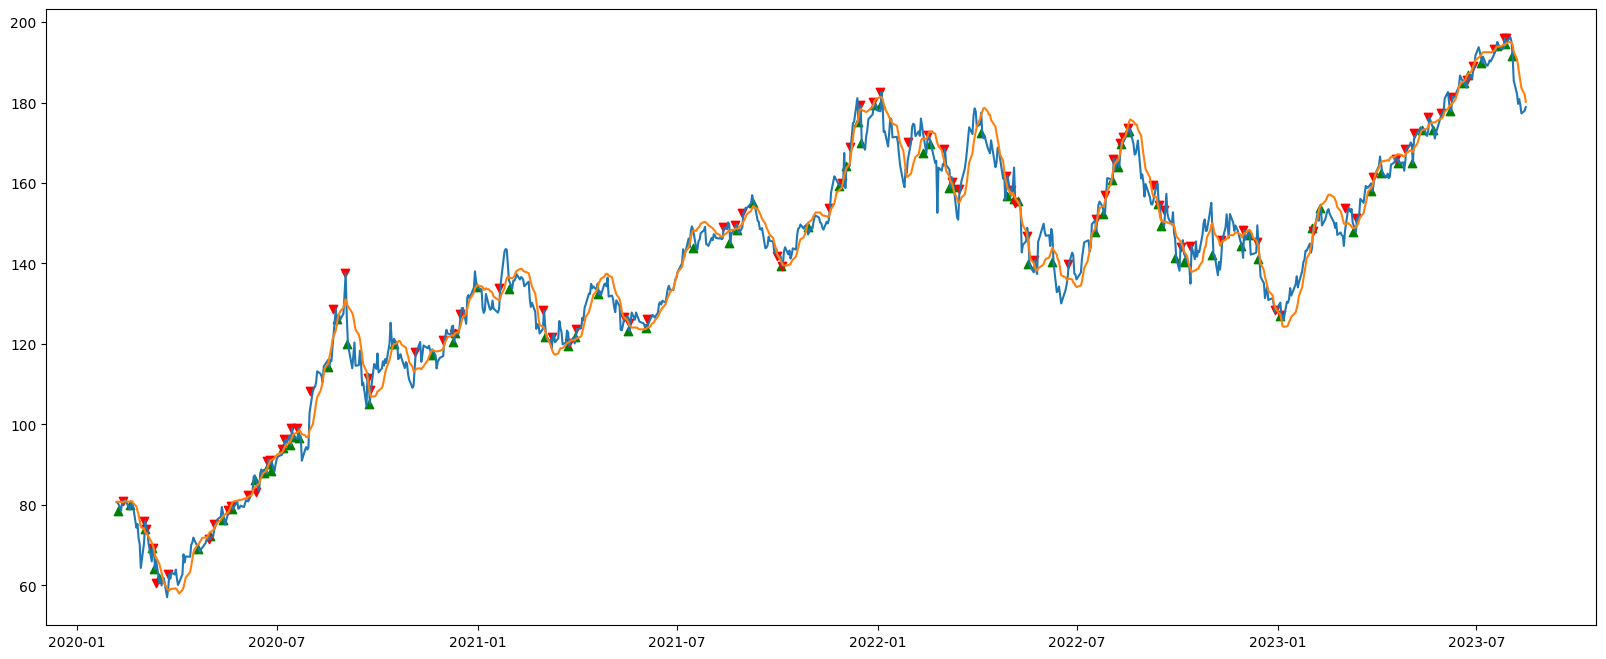

In [84]:
plt.figure(figsize=(20,8))
plt.plot(all_df[["Open","LSMA"]])
plt.scatter(buydates,all_df.loc[buydates].shifted_open,marker="^",color="green")
plt.scatter(selldates,all_df.loc[selldates].shifted_open,marker="v",color="red")

In [85]:
(profits > 0).value_counts()

True     64
False    24
dtype: int64

In [86]:
64/(64+24)

0.7272727272727273

In [87]:
all_df

,LSMA,Open,High,Low,Close,Adj Close,Volume,signal_buy,signal_sell,shifted_open
2020-02-06,80.774163,80.642502,81.305000,80.065002,81.302498,79.311844,105425600,False,True,80.592499
2020-02-07,80.787501,80.592499,80.849998,79.500000,80.007500,78.233795,117684000,True,False,78.544998
2020-02-10,80.754316,78.544998,80.387497,78.462502,80.387497,78.605370,109348800,True,False,80.900002
2020-02-11,80.639746,80.900002,80.974998,79.677498,79.902496,78.131111,94323200,True,False,80.367500
2020-02-12,80.737346,80.367500,81.805000,80.367500,81.800003,79.986549,113730400,False,True,81.047501
...,...,...,...,...,...,...,...,...,...,...
2023-08-09,187.172434,180.869995,180.929993,177.009995,178.190002,177.949707,60378500,True,False,179.479996
2023-08-10,185.386895,179.479996,180.750000,177.600006,177.970001,177.729996,54686900,True,False,177.320007
2023-08-11,183.611570,177.320007,178.619995,176.550003,177.789993,177.789993,51988100,True,False,177.970001
2023-08-14,182.041417,177.970001,179.690002,177.309998,179.460007,179.460007,43675600,True,False,178.880005


In [88]:
177.449997/81.302498 -1	

1.1825897280548503